### Bilateral Filter Implementation
This notebook shows how Bilateral Filter is effective at removing noise from an image.<br>
Bilateral Filter's effectiveness is analysed by comparing its performance with that of Low Pass Filter and Edge Adaptive Filter with the help of ISNR metric

Importing the required libraries

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import math
from PIL import Image
import skimage.util as skp
from scipy import signal
%matplotlib inline

The Image is first opened via the PIL library.<br>
Then, it is converted to an array form to perform operations on it.<br>

Following is the display of the original image


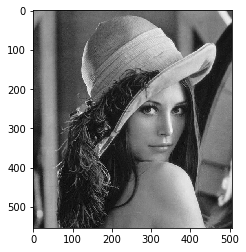

In [11]:
img = Image.open('lena/lenabw.jpg').convert('L')      
img.load()
I = np.asarray( img, dtype="uint8" )
plt.imshow(I,cmap='gray')
print('Following is the display of the original image')

Noise the image via gaussian noise and save it for future use<br>
Noised lena is displayed below:

Following is the display of the noised lena image


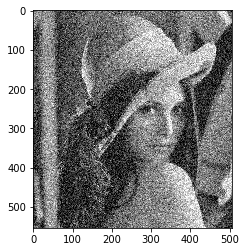

In [12]:
noise=skp.random_noise(I,mode='gaussian',var=0.02)
plt.imsave('gaussian_noise_lena.png',noise,cmap='gray')
plt.imshow(noise,cmap='gray')
print('Following is the display of the noised lena image')

Defining parameter radius for the Bilateral Filter.<br>
The image is given a padding of size 1 with its mean value 

In [13]:
I=noise
data=I
radius=7
I=np.lib.pad(I, 1, 'mean')
I_new=np.copy(data)

In [14]:
#Distance Function - calculates the absolute distance (1-norm?)
def distance(i, j):
    return np.absolute(i-j)

In [15]:
#The Bilateral Filter Function. The pseudocode was taken from Wikipedia and written in python
def bilateral_filter(i,j,d,I,sigma_d,sigma_r):
    arr=[]
    sum_num=0
    sum_den=0
    for k in range(i-math.floor(d/2),i+math.ceil(d/2)):
        for l in range(j-math.floor(d/2),j+math.ceil(d/2)):
            term1=(((i-k)**2)+(j-l)**2)/(sigma_d**2*2)
            term2=(distance(I[i,j],I[k,l]))/(sigma_r**2*2)
            term=term1+term2
            w=math.exp(-term)
            arr.append(w)
            sum_num=sum_num+(I[k,l]*w)
            sum_den=sum_den+w      
    return sum_num/sum_den

Following is the display of the denoised lena image via Bilateral Filter


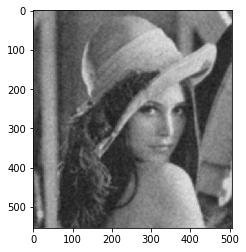

In [16]:
for i in range(1,data.shape[0]):
    for j in range(1,data.shape[1]):
        I_new[i-1,j-1]=bilateral_filter(i-1,j-1,radius,I,7,6.5)
plt.imsave('gn_lo2_bilateral_filtering_lena_new.png',I_new,cmap='gray')
plt.imshow(I_new,cmap='gray')
print('Following is the display of the denoised lena image via Bilateral Filter')

### Low Pass Filter applied on Noised Lena
The above results of Bilateral Filter can be compared with that of a Low Pass Filter(Gaussian Blur)

In [17]:
img = Image.open('gaussian_noise_lena.png').convert('L')      
img.load()
lena_noised = np.asarray(img, dtype="uint8" )

#lena_noised=np.asarray( noise, dtype="uint8" )
s = (7,7)
hpf=np.ones(s)
hpf = np.float_(hpf)
hpf=hpf/49
image1=signal.convolve2d(lena_noised,hpf,mode='same') 

Following is the display of the denoised lena image via LPF


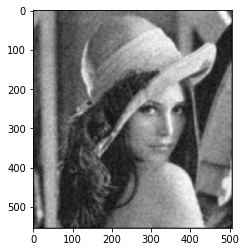

In [18]:
plt.imshow(image1,cmap='gray')
plt.imsave('gaussian_noise_filtered_lena_lpf2.png',image1,cmap='gray')
print('Following is the display of the denoised lena image via LPF')